<a href="https://colab.research.google.com/github/PrinceWallyy/MachineLearning/blob/master/ACML_Assignment_2_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weights & Biases

In [1]:
!pip install wandb -q

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 139 kB 22.6 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 180 kB 47.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


In [2]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Preprocess

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils import np_utils

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
(x_train, _), (x_test, _) = cifar10.load_data()
data = np.vstack((x_train, x_test))
data = data / 255
(x_train, x_val, x_test) = np.vsplit(data, np.array([48000, 54000]))
assert x_train.shape == (48000, 32, 32, 3)
assert x_val.shape == (6000, 32, 32, 3)
assert x_test.shape == (6000, 32, 32, 3)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
x_gray_train = tf.image.rgb_to_grayscale(x_train)
x_gray_val = tf.image.rgb_to_grayscale(x_val)
x_gray_test = tf.image.rgb_to_grayscale(x_test)

In [6]:
x_yiq_train = tf.image.rgb_to_yiq(x_train)
x_yiq_val = tf.image.rgb_to_yiq(x_val)
x_yiq_test = tf.image.rgb_to_yiq(x_test)

x_iq_train = np.delete(x_yiq_train, 0, axis=3)
x_iq_val = np.delete(x_yiq_val, 0, axis=3)
x_iq_test = np.delete(x_yiq_test, 0, axis=3)

# Grayscale - RGB

In [7]:
input_shape = (32, 32, 1)

In [8]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16,(3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

  return model

In [9]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 12)        1

In [10]:
history = model.fit(x_gray_train, x_train, epochs=10, validation_data=(x_gray_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 38s 7ms/step - loss: 0.0142 - accuracy: 0.4297 - val_loss: 0.0113 - val_accuracy: 0.4537
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0108 - accuracy: 0.4438 - val_loss: 0.0105 - val_accuracy: 0.4400
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0102 - accuracy: 0.4483 - val_loss: 0.0100 - val_accuracy: 0.4275
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0099 - accuracy: 0.4537 - val_loss: 0.0097 - val_accuracy: 0.4380
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0096 - accuracy: 0.4662 - val_loss: 0.0095 - val_accuracy: 0.4953
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0094 - accuracy: 0.4778 - val_loss: 0.0093 - val_accuracy: 0.4800
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0093 - accuracy: 0.4804 - val_loss: 0.0093 - val_ac

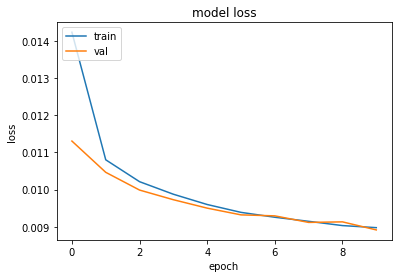

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_gray_test, x_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 4ms/step - loss: 0.0088 - accuracy: 0.4898
Test Error Rate:  51.02


In [13]:
pred_imgs = model.predict(x_gray_test)

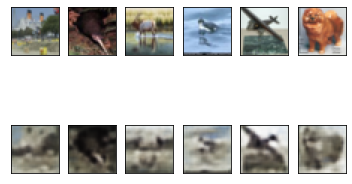

In [14]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Grayscale - Chrominance

In [15]:
input_shape = (32, 32, 1)

In [16]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16,(3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(2, (3, 3), padding='same', activation='sigmoid'))

  return model

In [17]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 12)       

In [18]:
history = model.fit(x_gray_train, x_iq_train, epochs=10, validation_data=(x_gray_val, x_iq_val))

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0060 - accuracy: 0.6469 - val_loss: 0.0039 - val_accuracy: 0.6464
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6525 - val_loss: 0.0039 - val_accuracy: 0.6475
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6532 - val_loss: 0.0039 - val_accuracy: 0.6480
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6536 - val_loss: 0.0039 - val_accuracy: 0.6483
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6539 - val_loss: 0.0039 - val_accuracy: 0.6485
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6540 - val_loss: 0.0039 - val_accuracy: 0.6486
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0039 - accuracy: 0.6541 - val_loss: 0.0039 - val_ac

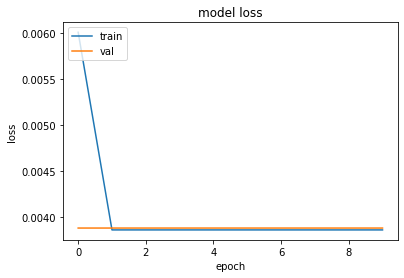

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
loss, accuracy = model.evaluate(x_gray_test, x_iq_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 4ms/step - loss: 0.0038 - accuracy: 0.6539
Test Error Rate:  34.61


In [35]:
pred_iq_imgs = model.predict(x_iq_test)
pred_yiq_imgs = np.concatenate((x_gray_test, pred_imgs), axis=3)

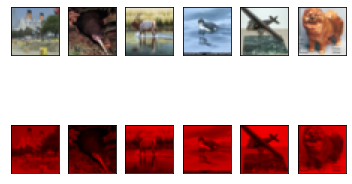

In [36]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_yiq_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()